+ https://experiencia21.tec.mx/courses/530360/pages/evaluacion
+ https://archive.ics.uci.edu/dataset/565/bone+marrow+transplant+children
+ https://arxiv.org/abs/1806.01579, https://arxiv.org/pdf/1806.01579
+ https://github.com/uci-ml-repo/ucimlrepo
  
# Overview

The data set describes pediatric patients with several hematologic diseases: malignant disorders (i.a. acute lymphoblastic leukemia, acute myelogenous leukemia, chronic myelogenous leukemia, myelodysplastic syndrome) and nonmalignant cases (i.a. severe aplastic anemia, Fanconi anemia, with X-linked adrenoleukodystrophy). All patients were subject to the unmanipulated allogeneic unrelated donor hematopoietic stem cell transplantation. 
 
The motivation of the study was to identify the most important factors influencing the success or failure of the transplantation procedure. In particular, the aim was to verify the hypothesis that increased dosage of CD34+ cells / kg extends overall survival time without simultaneous occurrence of undesirable events affecting patients' quality of life (KawÅ‚ak et al., 2010).

The data set has been used in our work concerning survival rules (WrÃ³bel et al., 2017) and user-guided rule induction (Sikora et al., 2019). The authors of the research on stem cell transplantation (KawÅ‚ak et al., 2010) who inspired our study also contributed to the set.

`Has Missing Values? Yes`

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path='../data/raw/bone-marrow.csv'
df = pd.read_csv(path)

In [3]:
df.columns, len(df.columns) # 37 columnas

(Index(['Recipientgender', 'Stemcellsource', 'Donorage', 'Donorage35', 'IIIV',
        'Gendermatch', 'DonorABO', 'RecipientABO', 'RecipientRh', 'ABOmatch',
        'CMVstatus', 'DonorCMV', 'RecipientCMV', 'Disease', 'Riskgroup',
        'Txpostrelapse', 'Diseasegroup', 'HLAmatch', 'HLAmismatch', 'Antigen',
        'Allele', 'HLAgrI', 'Recipientage', 'Recipientage10', 'Recipientageint',
        'Relapse', 'aGvHDIIIIV', 'extcGvHD', 'CD34kgx10d6', 'CD3dCD34',
        'CD3dkgx10d8', 'Rbodymass', 'ANCrecovery', 'PLTrecovery',
        'time_to_aGvHD_III_IV', 'survival_time', 'survival_status'],
       dtype='object'),
 37)

In [4]:
df.head()

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
0,1,1,22.830137,0,1,0,1,1.0,1.0,0.0,...,1.0,7.20,1.338760,5.38,35.0,19,51,32,999,0
1,1,0,23.342466,0,1,0,-1,-1.0,1.0,0.0,...,1.0,4.50,11.078295,0.41,20.6,16,37,1000000,163,1
2,1,0,26.394521,0,1,0,-1,-1.0,1.0,0.0,...,1.0,7.94,19.013230,0.42,23.4,23,20,1000000,435,1
3,0,0,39.684932,1,1,0,1,2.0,1.0,1.0,...,NaN,4.25,29.481647,0.14,50.0,23,29,19,53,1
4,0,1,33.358904,0,0,0,1,2.0,0.0,1.0,...,1.0,51.85,3.972255,13.05,9.0,14,14,1000000,2043,0


In [5]:
df.describe()

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,186.000000,185.000000,186.000000,...,156.000000,187.000000,182.000000,182.000000,185.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,0.598930,0.775401,33.472068,0.443850,0.598930,0.171123,0.390374,0.274194,0.854054,0.720430,...,0.820513,11.891781,5.385096,4.745714,35.801081,26752.866310,90937.919786,775408.042781,938.743316,0.454545
std,0.491431,0.418438,8.271826,0.498171,0.491431,0.377627,0.837632,0.938706,0.354010,0.449999,...,0.384996,9.914386,9.598716,3.859128,19.650922,161747.200525,288242.407688,418425.252689,849.589495,0.499266
min,0.000000,0.000000,18.646575,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.790000,0.204132,0.040000,6.000000,9.000000,9.000000,10.000000,6.000000,0.000000
25%,0.000000,1.000000,27.039726,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,...,1.000000,5.350000,1.786683,1.687500,19.000000,13.000000,16.000000,1000000.000000,168.500000,0.000000
50%,1.000000,1.000000,33.550685,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,9.720000,2.734462,4.325000,33.000000,15.000000,21.000000,1000000.000000,676.000000,0.000000
75%,1.000000,1.000000,40.117809,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,15.415000,5.823565,6.785000,50.600000,17.000000,37.000000,1000000.000000,1604.000000,1.000000
max,1.000000,1.000000,55.553425,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,1.000000,57.780000,99.560970,20.020000,103.400000,1000000.000000,1000000.000000,1000000.000000,3364.000000,1.000000


In [6]:
df.astype('category').describe()
# viendo los uniques se pueden identificar las variables categóricas

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
count,187,187,187.000000,187,187,187,187,186.0,185.0,186.0,...,156.0,187.00,182.000000,182.00,185.0,187,187,187,187,187
unique,2,2,187.000000,2,2,2,4,4.0,2.0,2.0,...,2.0,183.00,182.000000,163.00,130.0,18,50,28,174,2
top,1,1,18.646575,0,1,0,0,1.0,1.0,1.0,...,1.0,3.53,0.204132,0.13,23.0,15,1000000,1000000,41,0
freq,112,145,1.000000,104,112,155,73,75.0,158.0,134.0,...,128.0,2.00,1.000000,3.00,5.0,24,17,145,3,102


## Dtypes

Tipos de variable por columna del dataset: https://archive.ics.uci.edu/dataset/565/bone+marrow+transplant+children.

In [7]:
from ucimlrepo import fetch_ucirepo 
bone_marrow_transplant_children = fetch_ucirepo(id=565)

In [8]:
# bone_marrow_transplant_children.variables.head()
col_description = bone_marrow_transplant_children.variables[['name','type']].reset_index(drop=True)
col_description.head(3)

,name,type
0,Recipientgender,Binary
1,Stemcellsource,Binary
2,Donorage,Integer


In [9]:
col_description['type'].unique()
# tipos de datos 'Binary', 'Integer', 'Categorical'

array(['Binary', 'Integer', 'Categorical'], dtype=object)

In [10]:
cols_bin = col_description[col_description['type'] == 'Binary'].reset_index(drop=True)
cols_num = col_description[col_description['type'] == 'Integer'].reset_index(drop=True)
cols_cat = col_description[col_description['type'] == 'Categorical'].reset_index(drop=True)

In [11]:
# cols_bin.head(), cols_cat.head(), cols_num.head()

# Missing values

In [12]:
nan_counts = df.isna().sum()
columnas_con_nan = nan_counts[nan_counts > 0]
columnas_con_nan_ordenadas = columnas_con_nan.sort_values(ascending=False)
print(columnas_con_nan_ordenadas)

extcGvHD        31
CMVstatus       16
RecipientCMV    14
CD3dCD34         5
CD3dkgx10d8      5
DonorCMV         2
RecipientRh      2
Rbodymass        2
ABOmatch         1
RecipientABO     1
Allele           1
Antigen          1
dtype: int64


# Data Analysis

## Histograma

/tmp/ipykernel_87985/1740090913.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


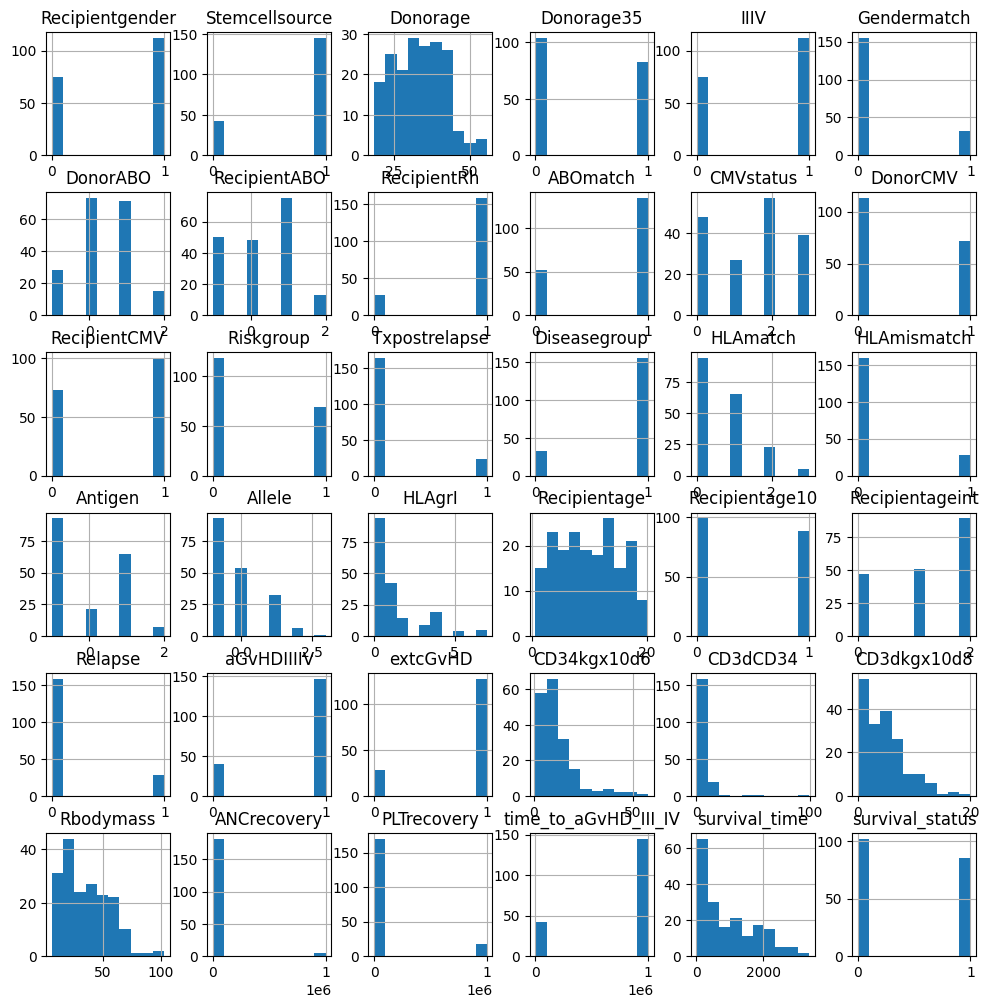

In [13]:
_, ax = plt.subplots(1,1,figsize=(12, 12))
df.hist(ax=ax)
plt.show()

## Binary Data

/tmp/ipykernel_87985/3115117053.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[cols_bin['name']].hist(ax=ax)


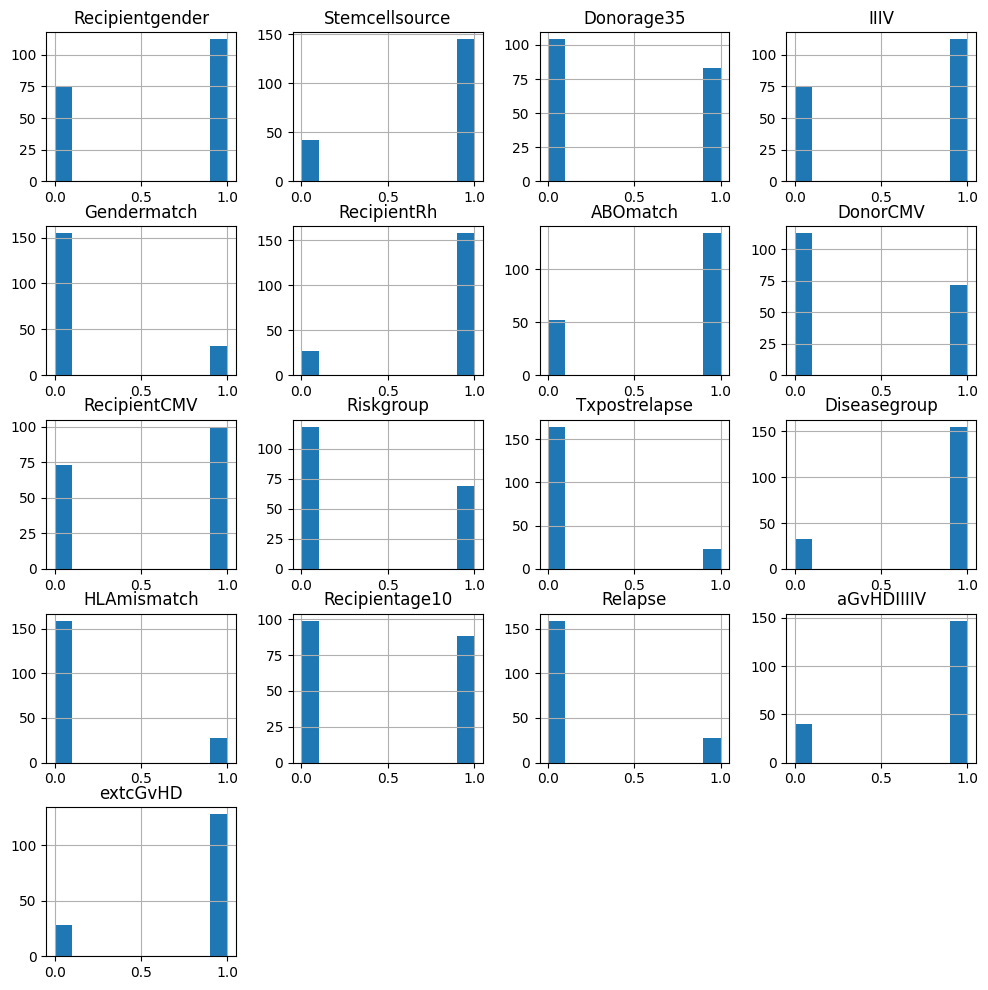

In [14]:
_, ax = plt.subplots(1,1,figsize=(12, 12))
df[cols_bin['name']].hist(ax=ax)
plt.show()

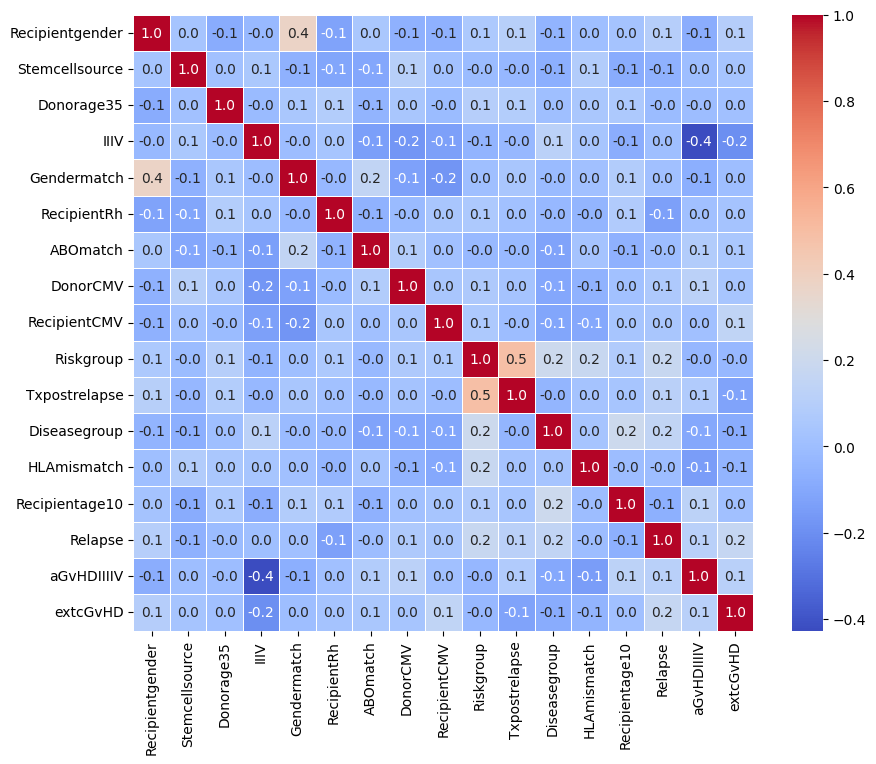

In [15]:
cor = df[cols_bin['name']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)
plt.show()
# se observan correlaciones mayores en: (Txpostrelapse, Riskgroup), (IIIV, aGvHDIIIIV), (Gendermatch, Reciientgender)

In [16]:
pd.crosstab(df[cols_bin['name'][0]],df[cols_bin['name'][1]])

Stemcellsource,0,1
Recipientgender,,
0,18,57
1,24,88


In [17]:
import itertools
for p in itertools.combinations(cols_bin['name'][:3], 2):
    print(p)
    print(pd.crosstab(df[p[0]],df[p[1]]))

('Recipientgender', 'Stemcellsource')
Stemcellsource    0   1
Recipientgender        
0                18  57
1                24  88
('Recipientgender', 'Donorage35')
Donorage35        0   1
Recipientgender        
0                38  37
1                66  46
('Stemcellsource', 'Donorage35')
Donorage35       0   1
Stemcellsource        
0               24  18
1               80  65


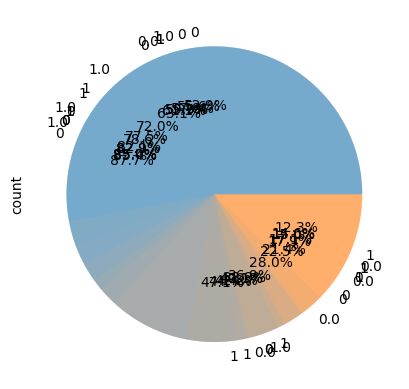

In [18]:
for c in cols_bin['name']:
    df[c].value_counts().plot.pie(autopct='%1.1f%%', wedgeprops={'alpha': 0.05})
plt.show()

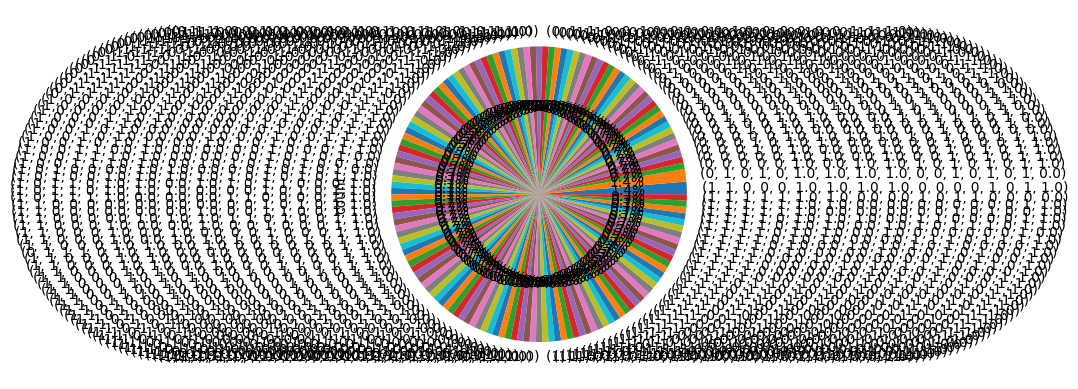

In [19]:
df[cols_bin['name']].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

## Numeric Data

In [20]:
df[cols_num['name']].astype('category').describe()
# se observa la presencia de survival_status (binaria)

,Donorage,Recipientage,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
count,187.000000,187.0,187.00,182.000000,182.00,185.0,187,187,187,187,187
unique,187.000000,125.0,183.00,182.000000,163.00,130.0,18,50,28,174,2
top,18.646575,17.8,3.53,0.204132,0.13,23.0,15,1000000,1000000,41,0
freq,1.000000,5.0,2.00,1.000000,3.00,5.0,24,17,145,3,102


In [21]:
cor = df[cols_num['name']].corr()

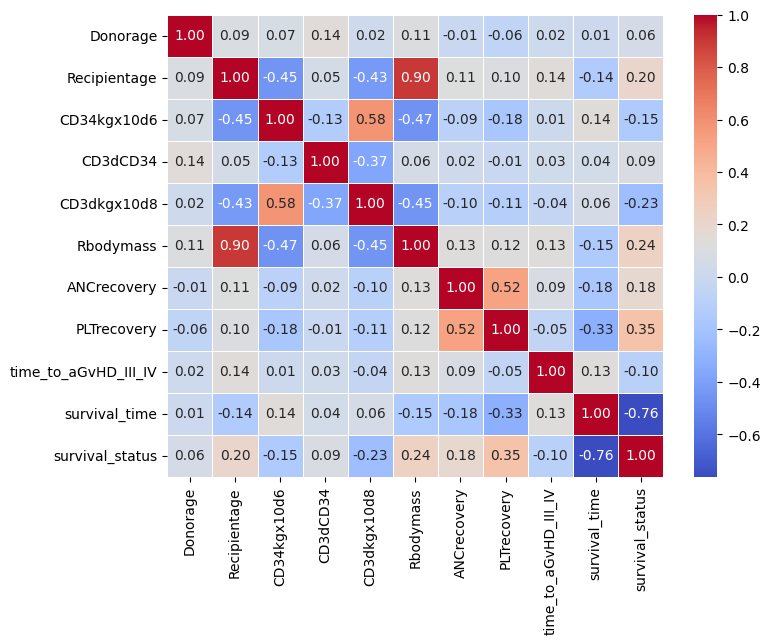

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()
# correlaciones altas entre (Rbodymass, Recipienage), (CD3dkgx10d8, CD34kgx10d6), (survival_status, survival_time)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
cols_a_estandarizar = df[cols_num['name']]
scaler = StandardScaler()
df_scaled = pd.DataFrame()
df_scaled[cols_num['name']] = scaler.fit_transform(cols_a_estandarizar)

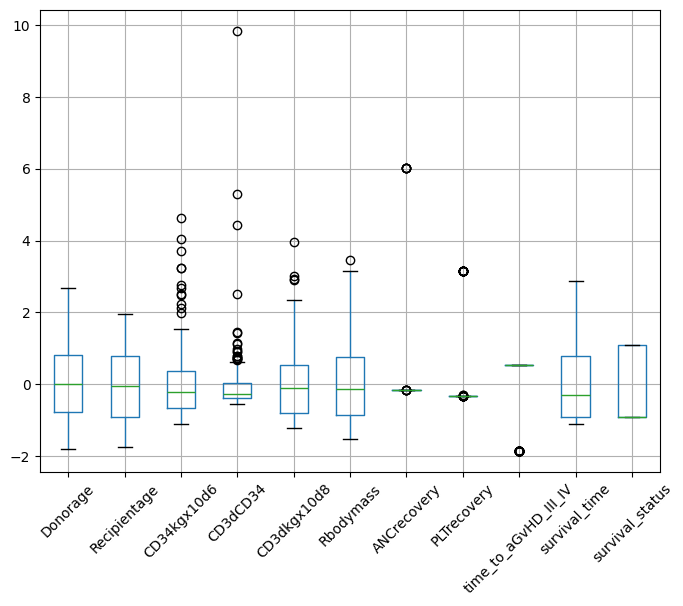

In [25]:
plt.figure(figsize=(8, 6))
df_scaled[cols_num['name']].boxplot()
plt.xticks(rotation=45)
plt.show()
# datos estandarizados

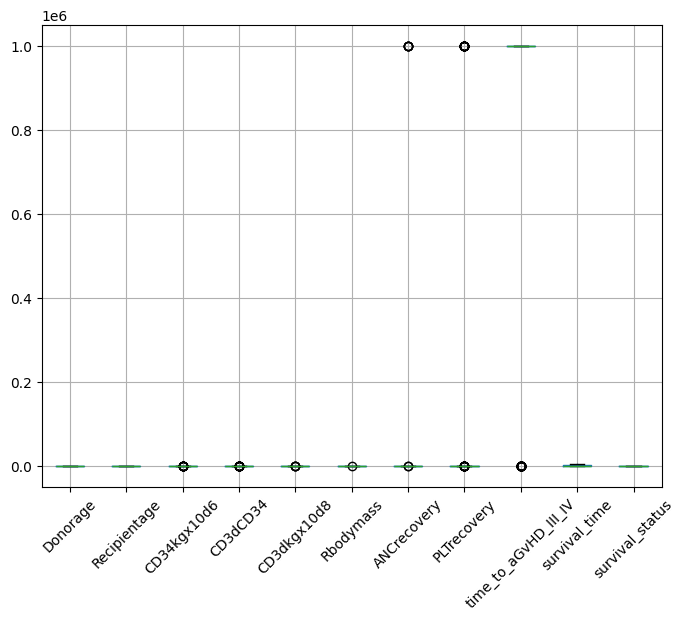

In [31]:
plt.figure(figsize=(8, 6))
df[cols_num['name']].boxplot()
plt.xticks(rotation=45)
plt.show()
# datos raw

## Categorical Data

In [27]:
df[cols_cat['name']].head(3)

,DonorABO,RecipientABO,CMVstatus,Disease,HLAmatch,Antigen,Allele,HLAgrI,Recipientageint
0,1,1.0,3.0,ALL,0,-1.0,-1.0,0,1
1,-1,-1.0,0.0,ALL,0,-1.0,-1.0,0,0
2,-1,-1.0,2.0,ALL,0,-1.0,-1.0,0,1


In [28]:
df[cols_cat['name']].astype('category').describe()

,DonorABO,RecipientABO,CMVstatus,Disease,HLAmatch,Antigen,Allele,HLAgrI,Recipientageint
count,187,186.0,171.0,187,187,186.0,186.0,187,187
unique,4,4.0,4.0,5,4,4.0,5.0,7,3
top,0,1.0,2.0,ALL,0,-1.0,-1.0,0,2
freq,73,75.0,57.0,68,94,93.0,93.0,94,89


/tmp/ipykernel_87985/1394713740.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[cols_cat['name']].hist(ax=ax)


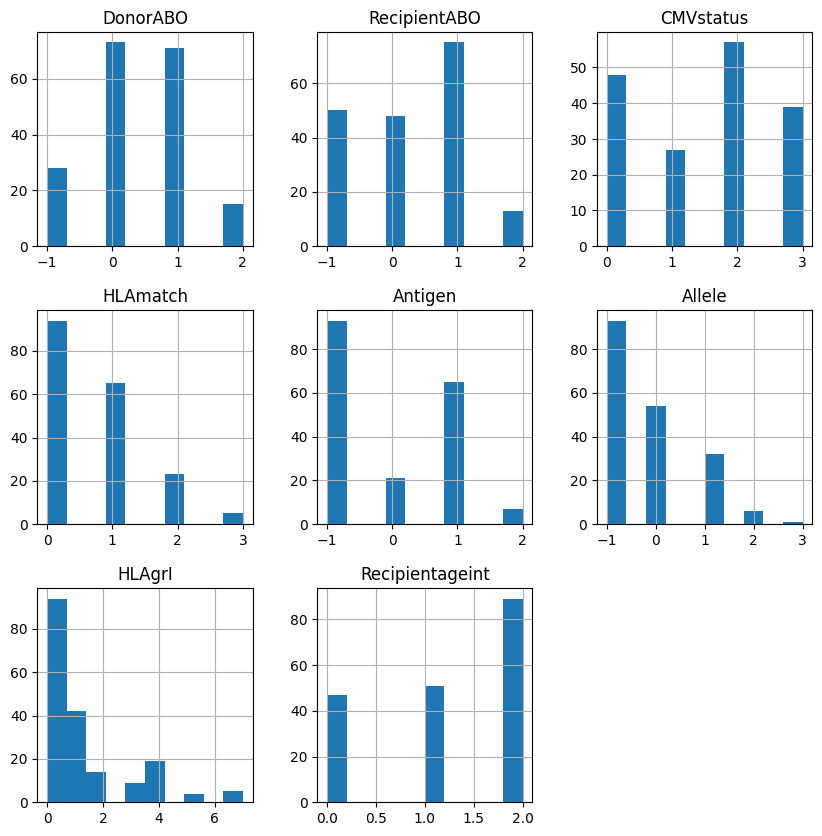

In [32]:
_, ax = plt.subplots(1,1,figsize=(10, 10))
df[cols_cat['name']].hist(ax=ax)
plt.show()

# ~Save to CSV~

In [30]:
# df.to_csv('../data/raw/bone-marrow.csv', index=False, header=True)